# Descriptive Statistics & Data Visualization

In [1]:
import pandas as pd
import seaborn as sns

1- Load the dataset from the given dataset.csv file

In [2]:
df = pd.read_csv('./dataset.csv', index_col=0)
df.head()

,feature_1,feature_2,feature_3,feature_4
0,0.286672,0.006711,0.178739,-4.997212
1,0.230586,0.013423,0.351505,-4.297285
2,0.074979,0.020134,0.879812,-3.884994
3,0.187541,0.026846,0.226149,-3.590439
4,0.422490,0.033557,0.424136,-3.360375


2- Plot the scatterplot matrix for the given dataset. What can be seen in the scatterplot matrix? (2 points)

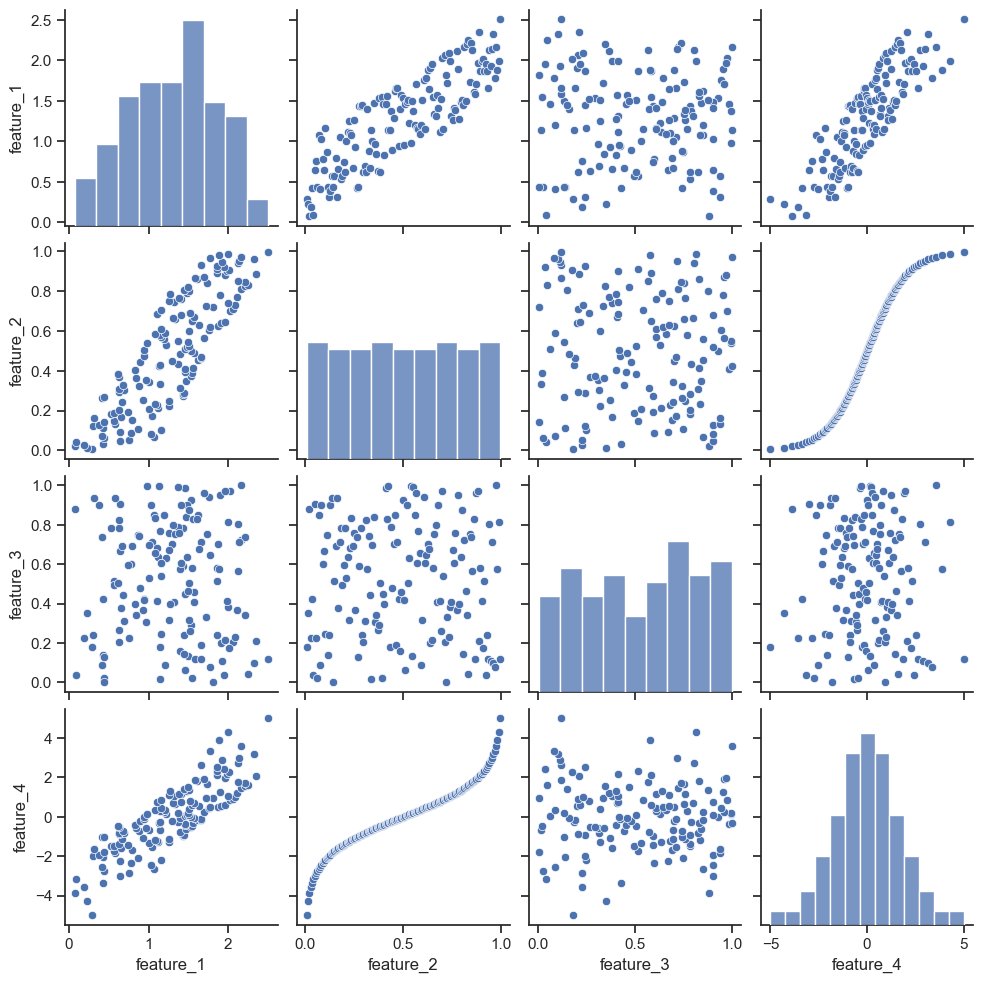

In [3]:
sns.set_theme(style="ticks")
sns.pairplot(df)

__Feature 1:__ has positive correlation with Feature 2 and Feature 4

__Feature 2:__ has positive correlation with Feature 1 and Feature 4

__Feature 3:__ has no correlation with any Feature

__Feature 4:__ has positive correlation with Feature 1 only.

#### Importing data_banknote_authentication dataset using pandas into a dataframe 'df'.

In [4]:

# importing data_banknote_authentication dataset using pandas modules
df = pd.read_csv('data_banknote_authentication.csv')

df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,NaN,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,NaN,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,NaN,0.0


Number of Columns and rows is calculated by len() method. df.axes[0] refers to the vertical axe of the dataframe which are the rows. df.axes[1] refers to horizontal axe of df which represents the columns

In [5]:
print(f'Number of rows : {len(df.axes[0])}')
print(f'Number of columns : {len(df.axes[1])}')

Number of rows : 1382
Number of columns : 5


The data set has values of type float. the following code checks type of values of each column in the first row.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1239 non-null   float64
 1   Skewness  1247 non-null   float64
 2   Curtosis  1251 non-null   float64
 3   Entropy   1236 non-null   float64
 4   Class     1247 non-null   float64
dtypes: float64(5)
memory usage: 54.1 KB


duplicated() method returns a new object labeling duplicated rows by "True" and non-duplicated rows by "False". sum() method counts the number of "True" values which represents the number of duplicates. removing duplicates is done by drop_duplicates() method which returns a new object.

In [7]:
# counting and removing duplicated rows
print(f'number of duplicates in the original dataframe: {df.duplicated().sum()} duplicates.')
df_no_duplicates = df.drop_duplicates()
print(f'number of duplicates in the new dataframe: {df_no_duplicates.duplicated().sum()} duplicates.')

number of duplicates in the original dataframe: 23 duplicates.
number of duplicates in the new dataframe: 0 duplicates.


Counting number of missing values per each column can be done using isnull() method which label cells with missing values by "True" and sum() which counts number of "True" values per each column. using sum() another time will return the total of missing values in the whole dataframe which = 690.

In [8]:
# Count the number of missing values per Column.
print(f'the number of missing values per Column:\n{df.isnull().sum()}\n')

# Total number of missing values.
print(f'Total number of missing values = {df.isnull().sum().sum()}')

the number of missing values per Column:
Variance    143
Skewness    135
Curtosis    131
Entropy     146
Class       135
dtype: int64

Total number of missing values = 690


In [9]:
# Check statistics of the Dataset to determine how to deal with missing values.
df_no_duplicates.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1217.000000,1224.000000,1229.000000,1215.000000,1224.000000
mean,0.453321,1.855624,1.400963,-1.179781,0.446078
std,2.827475,5.843242,4.346529,2.084477,0.497287
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.749000,-1.875850,-1.632600,-2.345900,0.000000
50%,0.508130,2.292750,0.572080,-0.599580,0.000000
75%,2.823200,6.720500,3.186300,0.367655,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


We will deal with missing values by replacing them with the mean of the column because columns are skewed so the mean won't affect the data variance or distribution. fillna() method is used to fill NaN values with a specific value (given or calculated). df.mean() as an argument will replace NaN values with the mean of the column.

In [10]:
df_no_nulls = df_no_duplicates.fillna(df.mean())
df_no_nulls

,Variance,Skewness,Curtosis,Entropy,Class
0,0.462758,8.66610,-2.8073,-0.44699,0.000000
1,4.545900,8.16740,-2.4586,-1.46210,0.000000
2,3.866000,-2.63830,1.9242,-1.19352,0.000000
3,3.456600,9.52280,-4.0112,-3.59440,0.000000
4,0.329240,-4.45520,4.5718,-1.19352,0.000000
...,...,...,...,...,...
1367,0.406140,1.34920,-1.4501,-0.55949,1.000000
1368,-1.388700,-4.87730,6.4774,0.34179,1.000000
1369,-3.750300,-13.45860,17.5932,-2.77710,1.000000
1370,-3.563700,-8.38270,12.3930,-1.28230,1.000000


In [11]:
df_no_nulls.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,0.454307,1.858647,1.398444,-1.181237,0.445261
std,2.675568,5.545208,4.133259,1.970868,0.471929
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.538550,-0.923945,-1.327550,-1.992850,0.000000
50%,0.462758,1.886057,0.909670,-0.872420,0.437851
75%,2.549650,6.135400,2.796000,0.282955,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The count of values is the same for each column. No missing values anymore.

Creating a Parallel Coordinates Plot based on 'Class' column, setting lines colors to transparent yellow, red, and black using RGB values.

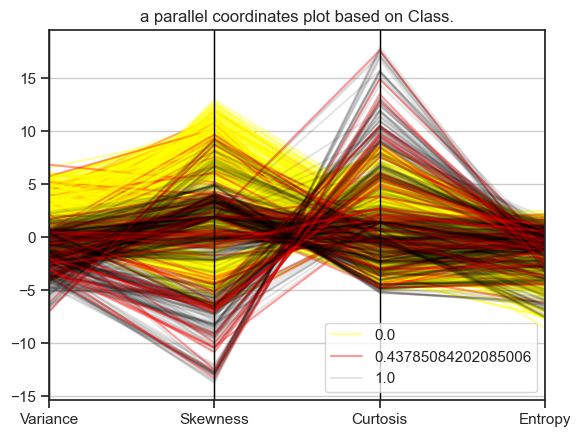

In [12]:
# create a parallel coordinates plot. Color the lines based on class assignment.
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

parallel_coordinates(df_no_nulls, 'Class', color=[[1,1,0,0.4],[1,0,0,0.4],[0,0,0,0.1]])
plt.title("a parallel coordinates plot based on Class.")
plt.legend()
plt.show()

Load the Iris dataset into your notebook from Scikit-Learn

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

Load the dataset into a pandas dataframe

In [14]:
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Report the descriptive statistics of the features of the iris dataset.

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#Variance
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [17]:
#MAD
import scipy

for i in iris['feature_names']:
    print(i, scipy.stats.median_abs_deviation(iris_df[i]))

sepal length (cm) 0.7000000000000002
sepal width (cm) 0.2999999999999998
petal length (cm) 1.25
petal width (cm) 0.7


Plot a density plot for each of the variables. Interpret the plots.

<Axes: ylabel='Density'>

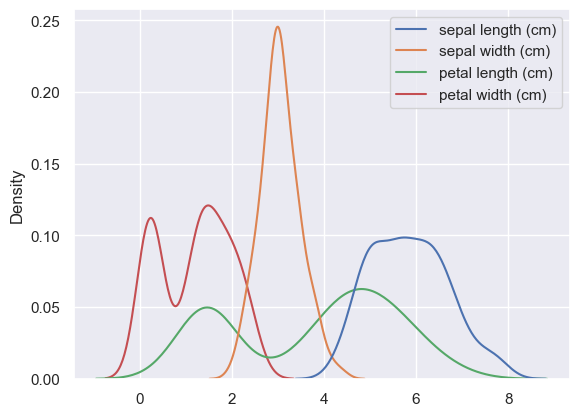

In [18]:
sns.set_style('darkgrid')
sns.kdeplot(iris_df)

Despite the classes, the sepal widths and lengths are generally concentrated, with sepal widths being more concentrated than sepal lengths. Additionally, both petal width and length distributions exhibit two peaks, indicating the presence of two distinct groups for each feature. Petal widths are more concentrated than petal lengths. Further analysis may reveal the connection between these features and classes.

C:\Users\Ahmed Hossam\AppData\Local\Temp\ipykernel_16024\2247426410.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_df['sepal width (cm)'], shade=True)


class    0   1    2
0      3.5 NaN  NaN
1      3.0 NaN  NaN
2      3.2 NaN  NaN
3      3.1 NaN  NaN
4      3.6 NaN  NaN
..     ...  ..  ...
145    NaN NaN  3.0
146    NaN NaN  2.5
147    NaN NaN  3.0
148    NaN NaN  3.4
149    NaN NaN  3.0

[150 rows x 3 columns]


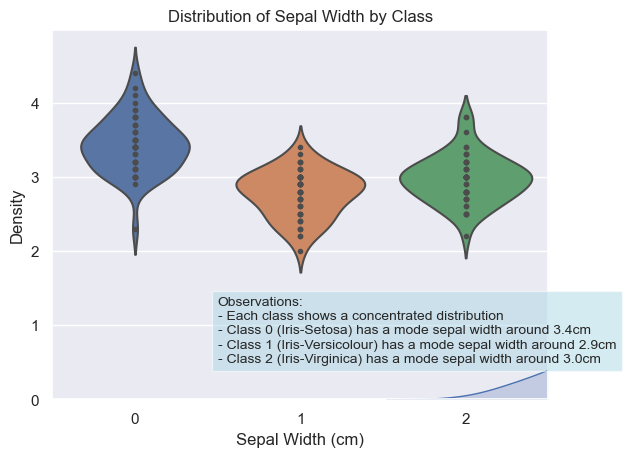

In [19]:
# Plotting kernel density estimate
sns.set_style('darkgrid')
sns.kdeplot(data=iris_df['sepal width (cm)'], shade=True)

# Adding class labels
iris_df['class'] = iris['target']
pivoted = iris_df.pivot(columns='class')

# Printing sepal width values for each class
print(pivoted['sepal width (cm)'])

# Plotting violin plot
sns.violinplot(data=pivoted['sepal width (cm)'], inner='point')

# Adding observations and results
plt.title('Distribution of Sepal Width by Class')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.text(0.5, 0.5, "Observations:\n- Each class shows a concentrated distribution\n- Class 0 (Iris-Setosa) has a mode sepal width around 3.4cm\n- Class 1 (Iris-Versicolour) has a mode sepal width around 2.9cm\n- Class 2 (Iris-Virginica) has a mode sepal width around 3.0cm", fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))

plt.show()
